# voc-images-and-masks-to-patch

This notebook converts a single 2250x2250 px image and its segmentation mask to 81 patches of width `w=242` for training and testing machine learning models. 

Its use differs slightly between the data labeled with LabeMe versus Scale.

In [1]:
#see load_label_png.py also.
import os
import os.path as osp
import glob
import numpy as np
import PIL.Image

In [2]:
#path = '/scratch/ssd/gallowaa/cciw/VOCdevkit/Train-all/'
path = '/scratch/ssd/gallowaa/cciw/VOCdevkit/Validation-v101-originals/'
#path = '/media/angus/cciw/VOCdevkit/train_v120_patches/'

In [3]:
label_path = os.path.join(path, 'SegmentationClass')
image_path = os.path.join(path, 'JPEGImages')

list_of_labels = os.listdir(label_path)
list_of_images = os.listdir(image_path)

print(len(list_of_labels))
print(len(list_of_images))

assert len(list_of_labels) == len(list_of_images)

55
55


## Set patch width `w`

In [4]:
w = 250 # in pixels. Results in 81 images for 2250x2250 (9x9)

# Save cropped masks

In [ ]:
for i in range(len(list_of_labels)):
    
    lab_file = os.path.join(
        label_path, list_of_labels[i].split('.')[0])
    lab = PIL.Image.open(lab_file + '.png')

    cnt = 0
    for row in range(lab.size[0] // w):
        for col in range(lab.size[0] // w):
            top = w * row
            bot = w * (row + 1)
            left  = w * col
            right = w * (col + 1)
            lab.crop(
                (left, top, right, bot)
            ).save(lab_file + '-' + str(cnt) + '.png')
            cnt += 1
    print(i, 'finished saving %d images' % cnt)

# Save cropped images

In [ ]:
for i in range(len(list_of_images)):
    
    img_file = os.path.join(
        image_path, list_of_images[i].split('.')[0])
    img = PIL.Image.open(img_file + '.jpg')

    cnt = 0
    for row in range(img.size[0] // w):
        for col in range(img.size[0] // w):
            top = w * row
            bot = w * (row + 1)
            left  = w * col
            right = w * (col + 1)
            img.crop(
                (left, top, right, bot)
            ).save(img_file + '-' + str(cnt) + '.jpg')
            cnt += 1
    print(i, 'finished saving %d images' % cnt)

# Create Text Files for Data Split

In [ ]:
originals_and_patches = os.listdir(osp.join(path, 'JPEGImages'))
originals_and_patches.sort()
print(len(originals_and_patches))

In [ ]:
# the originals end with '*_crop.jpg', wheras patches end in ''*_crop-#.jpg'
patches = [item for item in originals_and_patches if 'crop.jpg' not in item]

"""check there are no originals in list of patches, 
this loop should display nothing"""
for i in range(len(patches)):
    if 'crop.jpg' in patches[i]:
        print(patches[i])

In [ ]:
# create the necessary directory if not already exists
image_sets_dir = osp.join(path, 'ImageSets/Segmentation')
if not osp.exists(image_sets_dir):
    os.makedirs(image_sets_dir)
    
# write the text file using csv library    
with open(osp.join(image_sets_dir, 'train.txt'), 'w') as f:
    for i in range(len(patches)):
        csvwriter = csv.writer(f, delimiter=',')
        csvwriter.writerow([patches[i].split('.')[0]])

# Visualization

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import matplotlib.font_manager as fm

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
fm.fontManager.ttflist += fm.createFontList(['thsarabunnew-webfont.ttf'])

xy = (0.05, 0.9)  # location of letter in upper left corner

SyntaxError: invalid syntax (<ipython-input-24-d7c0ace0f62b>, line 8)

In [30]:
matplotlib.rc('font', family='TH Sarabun New')
#matplotlib.rc('font')

In [29]:
matplotlib.rc?

In [6]:
list_of_images.sort()
list_of_labels.sort()

# uncomment to display the list of images
#list_of_images

In [10]:
i = 6
img_file = os.path.join(
        image_path, list_of_images[i].split('.')[0])
img = np.asarray(PIL.Image.open(img_file + '.jpg'))
lab_file = os.path.join(
        label_path, list_of_labels[i].split('.')[0])
lab = np.asarray(PIL.Image.open(lab_file + '.png'))

In [8]:
left = 0.02  # the left side of the subplots of the figure
right = 0.98   # the right side of the subplots of the figure
bottom = 0.02  # the bottom of the subplots of the figure
top = 0.98     # the top of the subplots of the figure
wspace = 0.05  # the amount of width reserved for space between subplots,
# expressed as a fraction of the average axis width
hspace = 0.05  # the amount of height reserved for space between subplots,
# expressed as a fraction of the average axis height

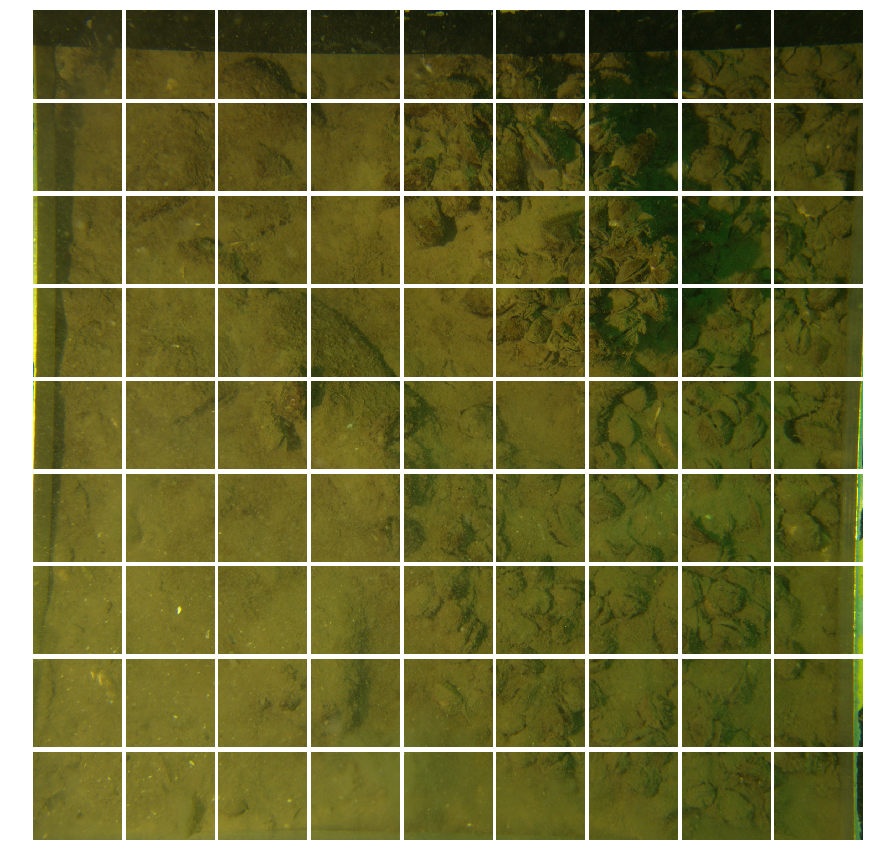

In [11]:
wvz = 250 # 340, 283, 242, 212
#lbl = np.asarray(img)
lbl = img.copy()
n_plot = lbl.shape[0] // wvz
fig, axes = plt.subplots(n_plot, n_plot, figsize=(12, 12))

for row in range(lbl.shape[0] // wvz):
    for col in range(lbl.shape[0] // wvz):
        axes[row, col].imshow(lbl[row*wvz:(1+row)*wvz, col*wvz:(col+1)*wvz])
        axes[row, col].axis('off')
#plt.tight_layout()        
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
plt.show()
#plt.savefig(img_file.split('/')[-1] + '_img_viz.jpg')
#plt.savefig(lab_file.split('/')[-1] + '_lab_viz.png')

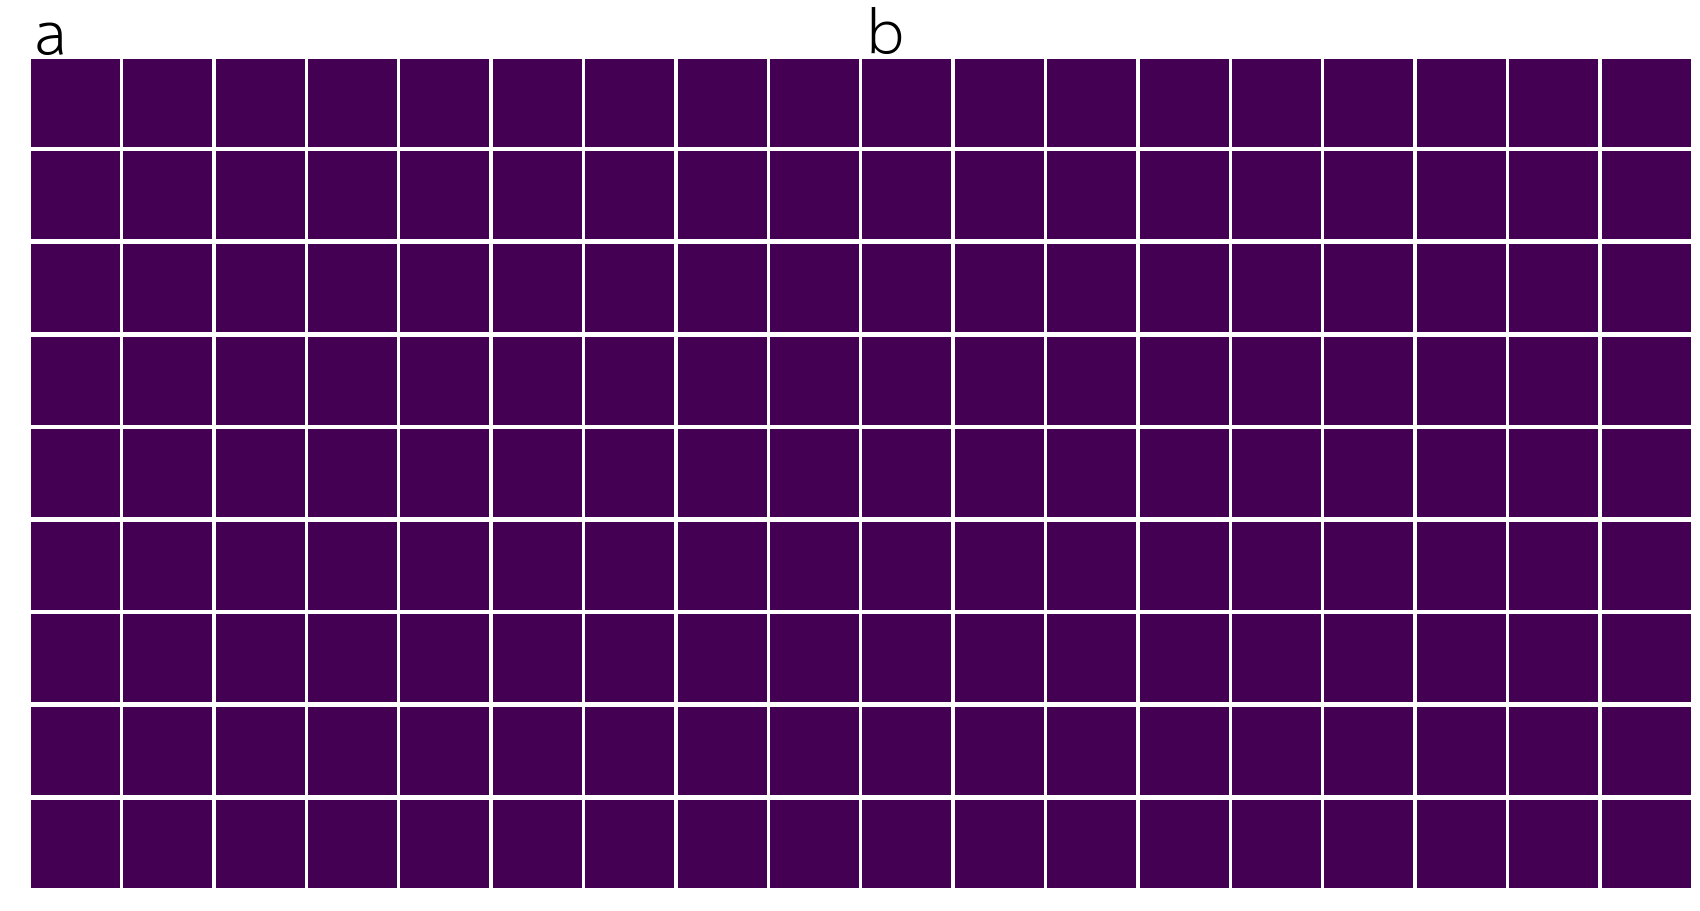

In [40]:
fs = 60
wvz = 250
xy = (0.05, 1.05)  # location of letter in upper left corner
n_plot = img.shape[0] // wvz

plt.close('all')
fig, axes = plt.subplots(nrows=n_plot, ncols=2*n_plot, figsize=(24, 12))

for row in range(img.shape[0] // wvz):
    for col in range(img.shape[0] // wvz):
        #axes[row, col].imshow(img[row*wvz:(1+row)*wvz, col*wvz:(col+1)*wvz])
        axes[row, col].imshow(np.zeros((wvz, wvz)))
        axes[row, col].axis('off')
        #axes[row, col + n_plot].imshow(lab[row*wvz:(1+row)*wvz, col*wvz:(col+1)*wvz])
        axes[row, col + n_plot].imshow(np.ones((wvz, wvz)))
        axes[row, col + n_plot].axis('off')

axes[0, 0].annotate('a', xy, xycoords='axes fraction', fontsize=fs, color='k')
axes[0, n_plot].annotate('b', xy, xycoords='axes fraction', fontsize=fs, color='k')

plt.tight_layout()
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
#plt.show()
#plt.savefig(img_file.split('/')[-1] + '_img_viz.jpg')
#plt.savefig(lab_file.split('/')[-1] + '_lab_viz.png')

In [38]:
#plt.annotate?
%matplotlib inline